In [811]:
# Import all applicable python libraries, and then begin data cleaning

In [812]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [813]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Assignment 1/sales_data (1).csv')

In [814]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


<Axes: xlabel='Units Sold', ylabel='Count'>

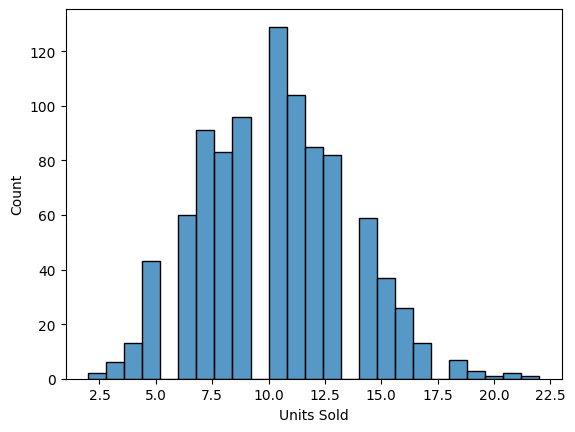

In [816]:
# Check for outlier by histplot
sns.histplot(df['Units Sold'])   # looks like normal distrbution, seems no outlier

In [817]:
# Data Cleaing
# Step 1

In [818]:
df['Price'] = df['Price'].fillna(df.groupby('Product')['Price'].transform('median'))


In [819]:
df['Units Sold'] = df['Units Sold'].fillna(df.groupby('Product')['Units Sold'].transform('median'))

In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       1039 non-null   float64
 3   Units Sold  1040 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [821]:
# Step 2
# Drop missing value

In [822]:
df.dropna(subset=['Product', 'Region', 'Price', 'Units Sold'],inplace=True)

In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       851 non-null    float64
 3   Units Sold  851 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


In [824]:
df

,Product,Region,Price,Units Sold,Sale Date
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,75.88,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
...,...,...,...,...,...
1044,Product_39,Region_6,239.07,10.0,2023-05-18
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17


In [825]:
# Step 3
# Total Analysis

In [826]:
product_sales = df['Units Sold'] * df['Price']
total_sales = product_sales.groupby(df['Product']).sum()
Region_sales = product_sales.groupby(df['Region']).sum()

In [827]:
Pop_sale = df.groupby('Product')['Units Sold'].sum()

In [828]:
Region_pop_sale = df.groupby('Region')['Units Sold'].sum()

The top five most popular product!

In [829]:
Pop_sale.sort_values(ascending=False).head()

Product
Product_24    289.0
Product_4     264.0
Product_8     263.5
Product_40    243.0
Product_43    233.0
Name: Units Sold, dtype: float64

The top five most profitable products ！

In [830]:
total_sales.sort_values(ascending=False).head()  # The top five most profitable products

Product
Product_34    53792.025
Product_49    40547.710
Product_27    35928.350
Product_50    33208.100
Product_23    29406.950
dtype: float64

The region that sold for the most money ！


In [831]:
Region_sales.sort_values(ascending=False).head()  # The region that sold for the most money

Region
Region_2     132398.140
Region_8     104736.430
Region_5      98142.630
Region_10     92169.730
Region_7      86288.985
dtype: float64

The region that sold for the most product ！

In [832]:
Region_pop_sale.sort_values(ascending=False).head()  # The region that sold for the most product

Region
Region_5    983.5
Region_7    947.5
Region_2    918.5
Region_8    892.0
Region_9    887.0
Name: Units Sold, dtype: float64

Base on those analysis, we can find that product 24 are the most popular one. Product 34 are most profitable. Region 2 sold for the most money. Region 5 were sold most product. 


In [833]:
# Step 4
# Year analysis

In [834]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [835]:
df['Year'] = df['Sale Date'].dt.year

In [836]:
data_by_year = {}
for year, data in df.groupby('Year'):
    data_by_year[year] = data

In [837]:
Year_sales = product_sales.groupby(df['Year']).sum()

Year Rank

In [838]:
Year_sales.sort_index(ascending=True).head() 

Year
2022    319510.755
2023    344632.765
2024    234563.235
dtype: float64

There is 7.28% increases in sales during 2022 ~  2023 

In [840]:
(Year_sales.iloc[1] - Year_sales.iloc[0]) / Year_sales.iloc[1] * 100 

7.289501333397598

There is 46.93% decreases in sales during 2023 ~  2024, We have to find the reason why!

In [841]:
(Year_sales.iloc[2] - Year_sales.iloc[1]) / Year_sales.iloc[2] * 100 

-46.92531205924065

In [842]:
index_22 = df['Year'] == 2022
index_23 = df['Year'] == 2023
index_24 = df['Year'] == 2024

In [843]:
Year_Pop_sale_22 = df[index_22].groupby(['Product'])['Units Sold'].sum()
Year_Pop_sale_23 = df[index_23].groupby(['Product'])['Units Sold'].sum()
Year_Pop_sale_24 = df[index_24].groupby(['Product'])['Units Sold'].sum()

In [844]:
Year_R_sale_22 = df[index_22].groupby(['Region'])['Units Sold'].sum()
Year_R_sale_23 = df[index_23].groupby(['Region'])['Units Sold'].sum()
Year_R_sale_24 = df[index_24].groupby(['Region'])['Units Sold'].sum()

In [870]:
pd.DataFrame(Year_Pop_sale_22)
pd.DataFrame(Year_Pop_sale_23)
pd.DataFrame(Year_Pop_sale_24)
P_22_23 = ((Year_Pop_sale_23 - Year_Pop_sale_22) / Year_Pop_sale_23)
P_23_24 = ((Year_Pop_sale_24 - Year_Pop_sale_23) / Year_Pop_sale_24)

In [900]:
positive_count_22_23 = len(P_22_23[P_22_23 > 0])   # The number of positive increases in product
positive_count_22_23
(positive_count_22_23 / len(P_22_23)) * 100   # 42% of sales in product are increases / 58% of decreased



42.0

In [899]:
positive_count_23_24 = len(P_23_24[P_23_24 > 0])
positive_count_23_24
(positive_count_23_24 / len(P_23_24)) * 100   # 30% of sales in product are increases / 70 % are decreased

30.0

In [845]:
Year_R_sale_22.sort_values(ascending=False).head()

Region
Region_8    379.0
Region_5    372.5
Region_7    359.5
Region_9    339.0
Region_2    328.5
Name: Units Sold, dtype: float64

In [846]:
pd.DataFrame(Year_R_sale_22)
pd.DataFrame(Year_R_sale_23)
pd.DataFrame(Year_R_sale_24)
Y_22_23_R8 = (Year_R_sale_23.loc['Region_8'] - Year_R_sale_22.loc['Region_8']) / Year_R_sale_23.loc['Region_8']

Y_23_24_R1 = (Year_R_sale_24.loc['Region_1'] - Year_R_sale_23.loc['Region_1']) / Year_R_sale_24.loc['Region_1']

In [861]:
Y_22_23 = ((Year_R_sale_23 - Year_R_sale_22) / Year_R_sale_23)
Y_23_24 = ((Year_R_sale_24 - Year_R_sale_23) / Year_R_sale_24)

In [867]:
pd.DataFrame(Y_22_23).sort_values(by='Units Sold', ascending=False).head(10)


,Units Sold
Region,
Region_10,0.354620
Region_1,0.268930
Region_4,0.068852
Region_9,0.041018
Region_6,0.002045
Region_2,-0.013889
Region_5,-0.031856
Region_3,-0.145985
Region_7,-0.404297


In [901]:
Y_count_22_23 = len(Y_22_23[Y_22_23 > 0])   # The number of positive increases in region
Y_count_22_23
(Y_count_22_23 / len(Y_22_23)) * 100   # 50% of sales product in region are increases / 50 % are decreased

50.0

In [868]:
pd.DataFrame(Y_23_24).sort_values(by='Units Sold', ascending=False).head(10)

,Units Sold
Region,
Region_7,0.228916
Region_6,0.213826
Region_8,-0.106776
Region_2,-0.218045
Region_3,-0.286385
Region_4,-0.364653
Region_5,-0.444000
Region_10,-0.624724
Region_9,-0.817481


In [902]:
Y_count_23_24 = len(Y_23_24[Y_23_24 > 0])   # The number of positive increases in region
Y_count_23_24
(Y_count_23_24 / len(Y_23_24)) * 100   # 20% of sales product in region are increases / 80 % are decreased

20.0

In [847]:
Y_22_23_R8 * 100  #  Region 8 decreases the sales of product by 40.62% 2022-2023


-40.63079777365491

In [848]:
Y_23_24_R1 * 100   # Region 1 decreases the sales of product by 121.39% during 2023-2024

-121.38728323699422

In [849]:
Year_R_sale_23.sort_values(ascending=False).head()

Region
Region_1     383.0
Region_10    368.0
Region_5     361.0
Region_9     353.5
Region_2     324.0
Name: Units Sold, dtype: float64

In [850]:
Year_R_sale_24.sort_values(ascending=False).head()

Region
Region_7    332.0
Region_6    311.0
Region_2    266.0
Region_5    250.0
Region_8    243.5
Name: Units Sold, dtype: float64

Find out why the region sells most are change duing the time change!

In [903]:
Year_Pop_sale_22.sort_values(ascending=False).head()

Product
Product_15    135.0
Product_8     116.0
Product_4     116.0
Product_44    104.0
Product_17    100.0
Name: Units Sold, dtype: float64

In [852]:
Year_Pop_sale_23.sort_values(ascending=False).head()

Product
Product_24    163.0
Product_43    143.0
Product_10    120.0
Product_4     119.0
Product_23    114.0
Name: Units Sold, dtype: float64

In [853]:
Year_Pop_sale_24.sort_values(ascending=False).head()

Product
Product_19    119.0
Product_24     99.0
Product_8      88.0
Product_37     87.0
Product_43     76.0
Name: Units Sold, dtype: float64

The Product was popular in 22 & 23 become less popular in 24. Find out by what kind of reason? Enviroment, politics, tech...

<Axes: xlabel='Units Sold', ylabel='Count'>

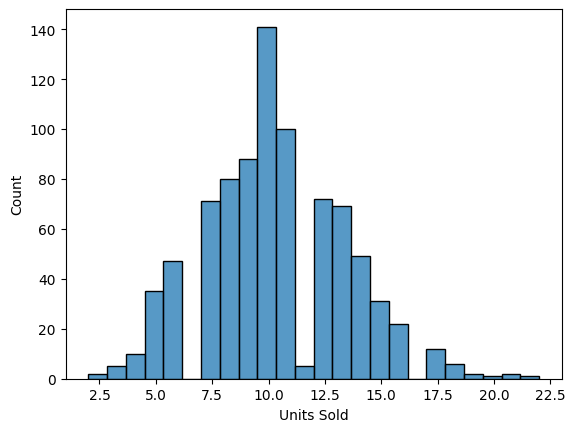

In [854]:
sns.histplot(df['Units Sold'])  # most of us item selled 10 each time

1. What conclusions can you draw about sales performance of various products and regions?

First,let's see the Total data analysis. 24/4/8/40/43 is our top 5 best-selling products. But it's not in the top five profitable lists. The most profitable product is the product 34/49/27/50/23. So the company needs to promote the most profitable product vigorously.
Region 2/8/5/10/7 sells the most money, region 5/7/2/8/9 sells the most products, the company should focus on region 2/8/5/8, these regions sell more things, but also make money.

Then there's the annual analysis,  Year 22-23 has increased sales slighlty. However,in 23-24, the company seemed to have changed a lot,  with a 46% drop in sales. The company needs to find out whether internal management or external environmental factors  caused the problem, which is crucial. In 22-23, the sales volume increased by 42% and decreased by 58%, but the total revenue increased by 7.28%. It could be that sales of more valuable goods go up and sales of less valuable goods go down. During 23-24, the sales of 30% products increased and 70% products decreased, but the sales decreased by 46.93%. A big reason might be that valuable goods are not selling, probably because of the economic environment.

 Also， The company's sales in 24 years are largely due to external market changes, but also partly due to internal operational problems. According to the analysis of 22-23, the company does not focus on maintaining regions with high sales, such as Region 8 decreases the sales of product by 40.62% 2022-2023, Region 1 decreases the sales of product by 121.39% during 2023-2024. Region 1 Decreases the sales of product by 121.39% during 2023-2024



2. What recommendations do you have for the business?

Companies need to adjust strategy, modify product lines, or discard some of the less important products or regions, so as to reduce the risk of unstable years. At the same time, companies need to focus on which products or regions sell well and invest more resources so that these advantages are not squandered。


3. Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

I use histplot to determine that the data has no outliers. Then data cleaning is carried out, and the median value is used to fill in the missing units sold and price. Then delete the missing products and regions.
I choose groupby (product) method to determine the median, because I think the median here can better represent the accuracy of data.
 calculating product and region by price or units sold, which may lead to inaccurate data, so I choose to delete them.
 